In [1]:
import librosa
import numpy as np
import soundfile as sf

In [2]:
y, sr = librosa.load("./Examples/000189_207360.ogg", sr=44100)
y

array([0.        , 0.        , 0.        , ..., 0.30034077, 0.33393788,
       0.36224267], dtype=float32)

## STFT Spectrogram inverse

In [3]:
S = librosa.stft(y=y)
y_stftinverse = librosa.istft(stft_matrix=S)
sf.write('test_stft.ogg', y_stftinverse, sr, format='ogg', subtype='vorbis')

/var/folders/29/817512nn0_jcnzq5mh7p09900000gn/T/ipykernel_4182/2590437041.py:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)


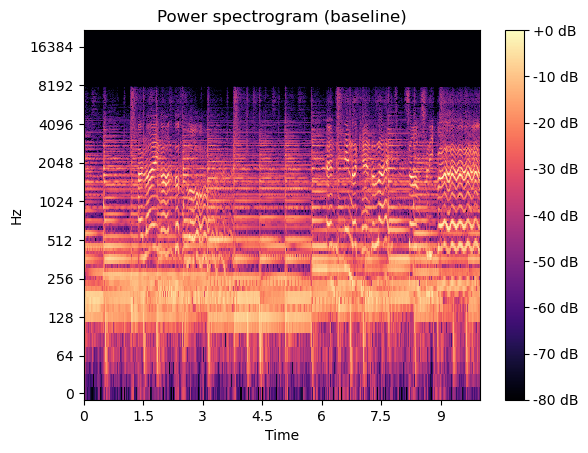

In [31]:
# Base spectrogram
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)
ax.set_title('Power spectrogram (baseline)')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

## Mel Spectrogram inverse

Note: due to phase approximation, the resulting waveform is perceptually different from the original

In [4]:
M = librosa.feature.melspectrogram(y=y, sr=sr)
y_melinverse = librosa.feature.inverse.mel_to_audio(M=M, sr=sr)
sf.write('test_mel.ogg', y_melinverse, sr, format='ogg', subtype='vorbis')

## STFT Spectrogram Inverse with Perturbation

### Patchout-like

In [5]:
# Patchout-like
patch_len = 25
S = librosa.stft(y=y)

def patchout(S:np.ndarray, patch_pos_t:int, patch_pos_f:int, patch_len:int) -> np.ndarray:
    S_perturbed = S.copy()
    S_perturbed[patch_pos_t:patch_pos_t+patch_len, patch_pos_f:patch_pos_f+patch_len] = np.zeros((patch_len, patch_len))
    return S_perturbed

In [6]:
S_perturbed = patchout(S=S, patch_pos_t=100, patch_pos_f=100, patch_len=25)
sf.write("stft_patchout.ogg", librosa.istft(stft_matrix=S_perturbed), sr, format='ogg', subtype='vorbis')

/var/folders/29/817512nn0_jcnzq5mh7p09900000gn/T/ipykernel_4182/3629354879.py:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(S_perturbed, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)


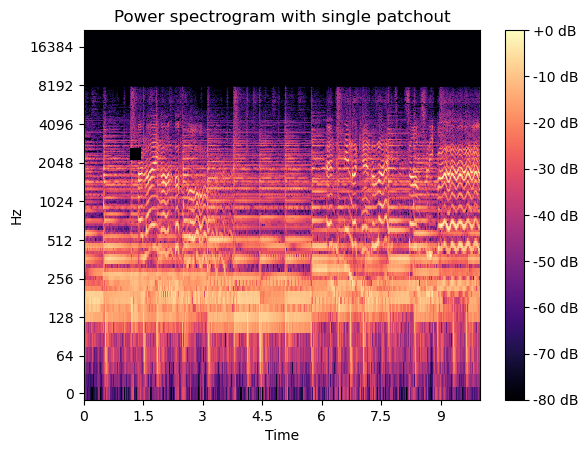

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_perturbed, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)
ax.set_title('Power spectrogram with single patchout')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

/var/folders/29/817512nn0_jcnzq5mh7p09900000gn/T/ipykernel_4182/3107208962.py:8: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(S_staircase, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)


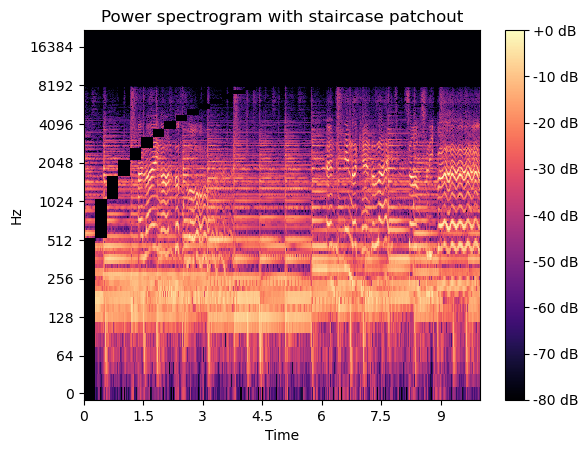

In [30]:
patch_len = 25
S_staircase = S.copy()
for i in range(0, 800, patch_len):
    S_staircase = patchout(S_staircase, patch_pos_t=i, patch_pos_f=i, patch_len=patch_len)

sf.write("stft_staircase.ogg", librosa.istft(stft_matrix=S_staircase), sr, format='ogg', subtype='vorbis')
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_staircase, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)
ax.set_title('Power spectrogram with staircase patchout')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

### Patch inversion

/var/folders/29/817512nn0_jcnzq5mh7p09900000gn/T/ipykernel_4182/2480215247.py:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(S_patchinvert, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)


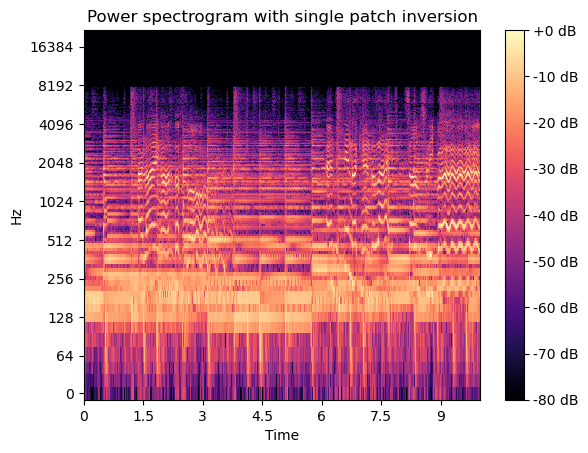

In [28]:
def patchinvert(S:np.ndarray, patch_pos_t:int, patch_pos_f:int, patch_len:int, axis:int=0):
    inv_patch = S[patch_pos_t:patch_pos_t+patch_len, patch_pos_f:patch_pos_f+patch_len].copy()
    inv_patch = np.flip(inv_patch, axis=axis)
    S_patchinvert = S.copy()
    S_patchinvert[patch_pos_t:patch_pos_t+patch_len, patch_pos_f:patch_pos_f+patch_len] = inv_patch
    return S_patchinvert

patch_len = 25
S_patchinvert = patchinvert(S=S, patch_pos_t=25, patch_pos_f=25, patch_len=patch_len)
sf.write("stft_patchinvert.ogg", librosa.istft(stft_matrix=S_patchinvert), sr, format='ogg', subtype='vorbis')
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_patchinvert, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)
ax.set_title('Power spectrogram with single patch inversion')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

/var/folders/29/817512nn0_jcnzq5mh7p09900000gn/T/ipykernel_4182/181556799.py:9: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(S_staircase_inv, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)


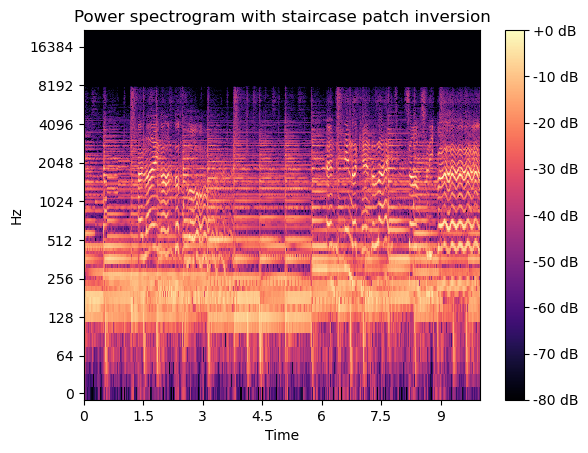

In [32]:
# Staircase invert
patch_len = 25
S_staircase_inv = S.copy()
for i in range(25, 800, patch_len):
    S_staircase_inv = patchinvert(S_staircase_inv, patch_pos_t=i, patch_pos_f=i, patch_len=patch_len)

sf.write("stft_staircase_inv.ogg", librosa.istft(stft_matrix=S_staircase_inv), sr, format='ogg', subtype='vorbis')
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_staircase_inv, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)
ax.set_title('Power spectrogram with staircase patch inversion')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

/var/folders/29/817512nn0_jcnzq5mh7p09900000gn/T/ipykernel_4182/2383657573.py:11: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(S_randinvert, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)


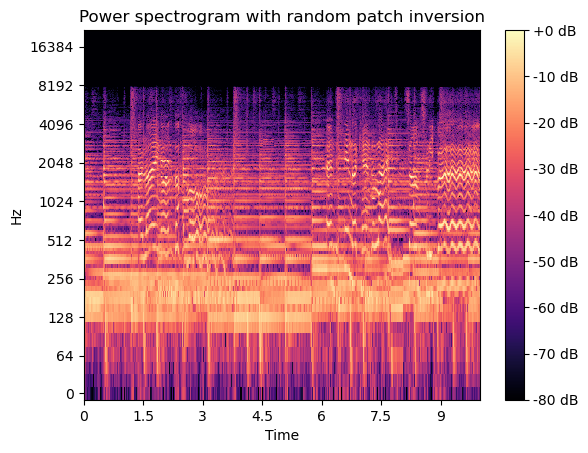

In [35]:
# Random patch invert
patch_len = 25
S_randinvert = S.copy()
for i in range(0, len(S), patch_len):
    # Choose a random position
    randpos = np.random.randint(0, S.shape[1]-patch_len)
    S_randinvert = patchinvert(S=S_randinvert, patch_pos_t=i, patch_pos_f=randpos, patch_len=patch_len, axis=0)

sf.write("stft_randinvert.ogg", librosa.istft(stft_matrix=S_randinvert), sr, format='ogg', subtype='vorbis')
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_randinvert, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)
ax.set_title('Power spectrogram with random patch inversion')
fig.colorbar(img, ax=ax, format="%+2.0f dB")


### Noise

/var/folders/29/817512nn0_jcnzq5mh7p09900000gn/T/ipykernel_4182/3514288693.py:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(S_noisy, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)


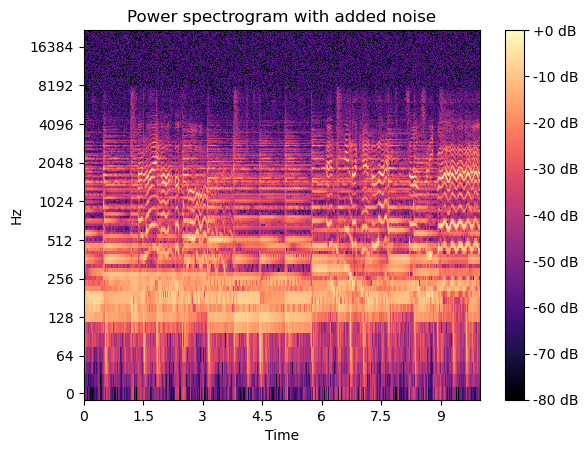

In [26]:
def add_noise(S:np.ndarray, mean:float, std:float):
    S_copy = S.copy()
    S_copy += np.random.normal(loc=mean, scale=std, size=S.shape)
    return S_copy

mean = 0.1
std = 0.1
S_noisy = add_noise(S, mean, std)

sf.write("stft_noise.ogg", librosa.istft(stft_matrix=S_noisy), sr, format='ogg', subtype='vorbis')
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_noisy, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)
ax.set_title('Power spectrogram with added noise')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

### Random Scaling

/var/folders/29/817512nn0_jcnzq5mh7p09900000gn/T/ipykernel_4182/3396256924.py:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(S_scaled, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)


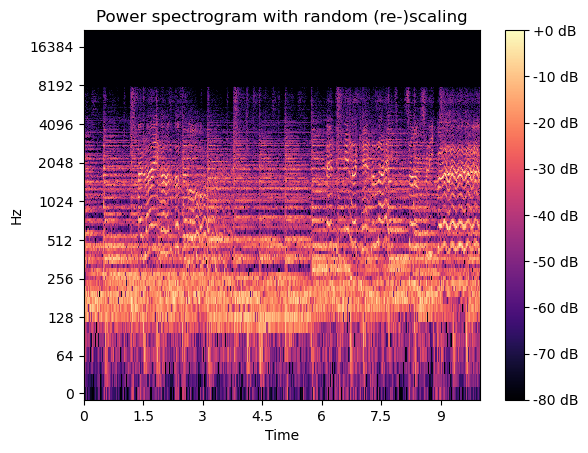

In [27]:
def random_scale(S:np.ndarray, mean:float=1.0, std:float=0.5):
    S_copy = S.copy()
    S_copy *= np.random.normal(loc=mean, scale=std, size=S_copy.shape)
    return S_copy

mean = 1
std = 0.5
S_scaled = random_scale(S, mean, std)

sf.write("stft_scaled.ogg", librosa.istft(stft_matrix=S_scaled), sr, format='ogg', subtype='vorbis')
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_scaled, ref=np.max), y_axis='log', x_axis='time', ax=ax, sr=sr)
ax.set_title('Power spectrogram with random (re-)scaling')
fig.colorbar(img, ax=ax, format="%+2.0f dB")